# DS Mood Tracker Project Notebook

## Introduction

## Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [3]:
# Display the first few rows of the dataframe
display(df.head())

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [4]:
# Display the shape of the dataframe
n_rows, n_cols = df.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 940 rows and 7 columns


In [5]:
# Display informative summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_date   940 non-null    object
 1   date        940 non-null    object
 2   weekday     940 non-null    object
 3   time        940 non-null    object
 4   sub_mood    940 non-null    object
 5   activities  893 non-null    object
 6   mood        940 non-null    object
dtypes: object(7)
memory usage: 51.5+ KB


In [6]:
# Display descriptive statistics of the dataframe
df.describe()


,full_date,date,weekday,time,sub_mood,activities,mood
count,940,940,940,940,940,893,940
unique,775,366,7,425,22,839,5
top,14/02/2018,Mar-01,Wednesday,9:00 pm,blessed,Dota 2 | streaming | youtube,Good
freq,4,7,139,65,174,10,487


In [7]:
# Convert 'full_date' and 'time' columns to datetime
#df['full_date'] = pd.to_datetime(df['full_date'], format='%d/%m/%Y')
df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )

C:\Users\jeelf\AppData\Local\Temp\ipykernel_90556\170747954.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )


In [8]:
# Drop unnecessary date columns
not_needed_date_columns = ['full_date', 'time', 'date']
df.drop(columns=not_needed_date_columns, inplace=True)

In [9]:
# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

# Sort the dataframe by index in descending order
df = df.sort_index(ascending=False)

In [10]:
# Check if the index is sorted in descending order
print(df.index.is_monotonic_decreasing)

# Check if the index is sorted in ascending order
print(df.index.is_monotonic_increasing)

True
False


In [11]:
# Check for missing values in the dataframe
df.isna().sum()

weekday        0
sub_mood       0
activities    47
mood           0
dtype: int64

In [12]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify that there are no missing values left
df.isna().sum()

weekday       0
sub_mood      0
activities    0
mood          0
dtype: int64

In [13]:
# Check for duplicates in the dataframe
display(df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify that there are no duplicates left
df.duplicated().sum()

1

0

In [14]:
# Split the 'activities' column into a list
df['activities'] = df['activities'].str.split('|')

# View the updated dataframe
display(df.head())

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


### Stretch Goals

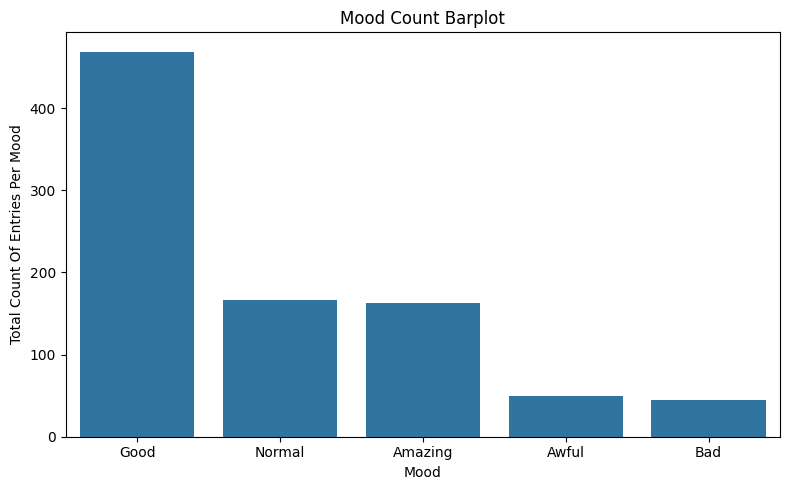

In [15]:
# Counting the occurrences of each mood
mood_counts = df['mood'].value_counts()

# Plotting the mood distribution
plt.figure(figsize=(8, 5))
plt.title('Mood Count Barplot')
plt.xlabel('Mood')
plt.ylabel('Total Count Of Entries Per Mood')
sns.barplot(data=mood_counts)
plt.savefig('mood_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [16]:
# Create a copy of the cleaned dataframe
df_copy = df.copy()

In [17]:
# Resample the data to weekly frequency and count moods
mood_weekly_counts = df_copy.resample('W')['mood'].value_counts().unstack().fillna(0)

good_mood_weekly_counts = mood_weekly_counts[['Amazing', 'Good', 'Normal']]
good_smoothed = good_mood_weekly_counts.rolling(window=7, center=True).mean()

bad_mood_weekly_counts = mood_weekly_counts[['Bad', 'Awful']]
bad_smoothed = bad_mood_weekly_counts.rolling(window=7, center=True).mean()

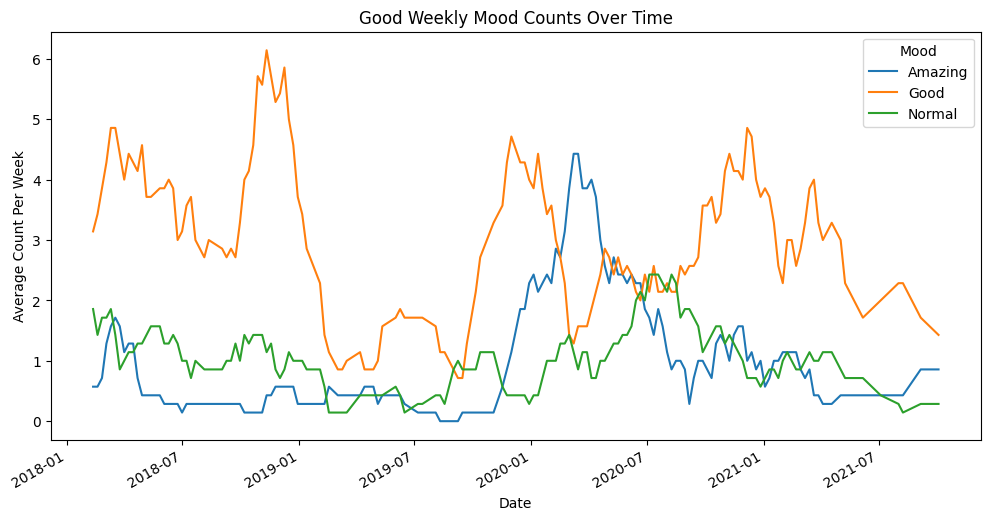

In [18]:
# Plotting the smoothed weekly good mood counts
good_smoothed.plot(figsize=(12,6))
plt.title("Good Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('good_mood_linechart.png', dpi=300, bbox_inches='tight')
plt.show()

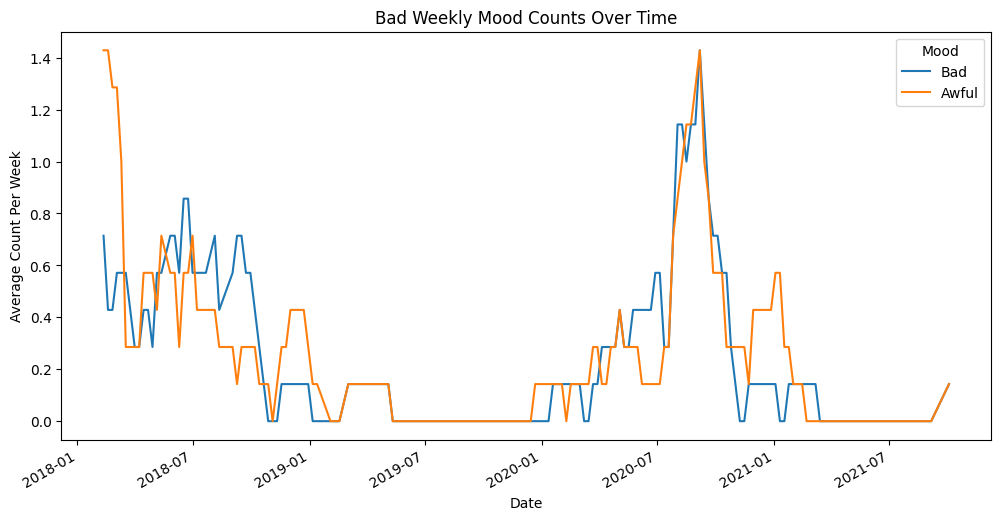

In [19]:
# Plotting the smoothed weekly bad mood counts
bad_smoothed.plot(figsize=(12,6))
plt.title("Bad Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('bad_mood_linecharts', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Encoding the 'mood' column
mood_map = {
    'Awful': 1,
    'Bad' : 2,
    'Normal' : 3,
    'Good' : 4,
    'Amazing' : 5
}

# Create a new column 'mood_encoded' with the encoded values
df['mood_encoded'] = df['mood'].map(mood_map)

In [21]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
mean_mood_score = df['mood_encoded'].mean()

# Print the mean mood score
print(f'Average Mood Score: {mean_mood_score:.2f}')

Average Mood Score: 3.73


In [22]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
most_common_mood = df['mood'].mode()

print(f"Most Common Mood Category: {most_common_mood[0]}")

Most Common Mood Category: Good


In [23]:
# Explode the 'activities' column to have one activity per row
activities_explode_df = df.explode('activities')

# Clean the 'activities' column by stripping whitespace and converting to lowercase
activities_explode_df['activities'] = activities_explode_df['activities'].str.strip().str.lower()

# Display the first few rows of the exploded activities dataframe
activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [24]:
# Display unique activities
activities_explode_df['activities'].unique()

array(['reading', 'learning', 'fasting', 'walk', 'meditation', 'shower',
       'writing', 'watching series', 'good meal', 'reddit',
       'language learning', 'streaming', 'youtube', 'cooking', 'cleaning',
       'research', 'new things', 'power nap', 'documentary', 'penpal',
       'coding', 'tutorial', 'prayer', 'podcast', 'audio books', 'songs',
       'email', 'art', 'quran', 'love', 'news update', 'yoga', 'family',
       'repair', 'travel', 'exercise', 'shave', 'movies', 'holotropic',
       'designing', 'trimming', 'poetry', 'write dairy', 'jobs',
       'recording', 'party', 'dota 2', 'weight log', 'keto', 'shopping',
       'video editing', 'friends', 'kaballah', 'gaming', 'phd', 'hiking',
       'hospital'], dtype=object)

In [25]:
# Calculate the most common activities
activities_sorted = activities_explode_df['activities'].value_counts()

# Sort the activities in descending order
activities_sorted = activities_sorted.sort_values(ascending=False)

# Display the top 10 most common activities
top_10_activities = activities_sorted.head(10)
display("Top 10 Most Common Activities:")
display(top_10_activities)

'Top 10 Most Common Activities:'

activities
youtube            769
streaming          709
good meal          586
audio books        552
reddit             541
meditation         540
watching series    538
walk               520
news update        520
fasting            484
Name: count, dtype: int64

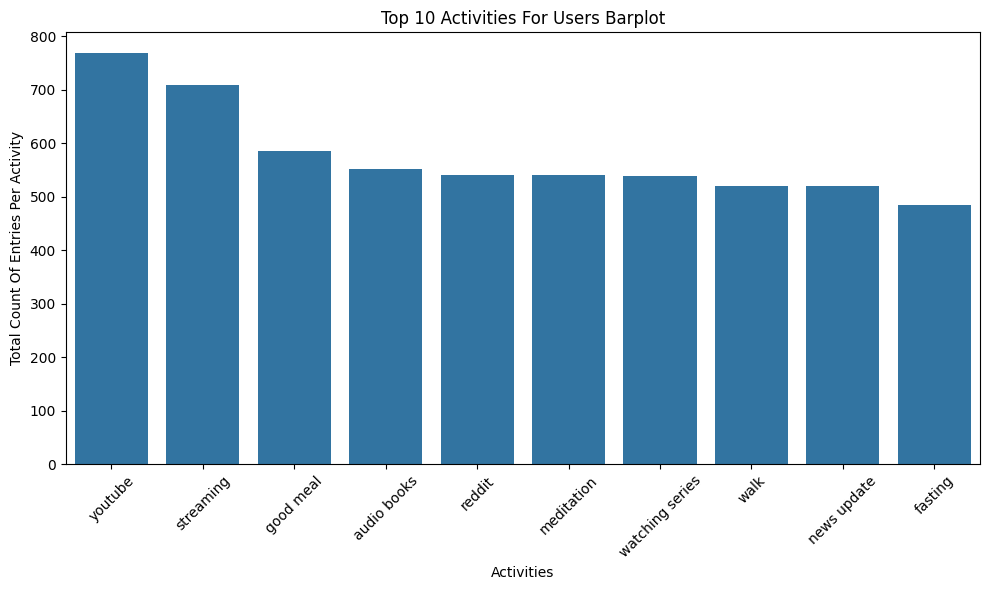

In [26]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
plt.title('Top 10 Activities For Users Barplot')
plt.xlabel('Activities')
plt.ylabel('Total Count Of Entries Per Activity')
sns.barplot(data=top_10_activities)
plt.xticks(rotation=45)
plt.savefig('top_10_activities_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [27]:
# Filter activities with medium frequency (between 365 and 405 occurrences)
medium_freq_activities = activities_sorted[(activities_sorted >= 365) & (activities_sorted <= 405)]

# Display the first few rows of medium frequency activities
medium_freq_activities.head(3)

activities
power nap    400
prayer       398
penpal       388
Name: count, dtype: int64

In [28]:
# Find the 5 least common activities
activities_ascending_sorted = activities_sorted.sort_values(ascending=True)
bottom_5_activities = activities_ascending_sorted.head(5)

# Display the 5 least common activities
display(bottom_5_activities)

activities
hiking           3
video editing    3
hospital         4
party            6
phd              7
Name: count, dtype: int64

### Stretch Goals

In [29]:
# Correlation analysis between selected activities and mood
activities_corr_list = [
    'youtube',
    'streaming',
    'good meal',
    'audio books',
    'reddit',
    'video editing',
    'hiking',
    'party',
    'phd',
    'power nap',
    'penpal'
    ]

activities_corr_df = activities_explode_df[activities_explode_df['activities'].isin(activities_corr_list)]
activities_encoded = pd.get_dummies(activities_corr_df['activities'], dtype=int)

activities_mood = pd.concat([activities_encoded, activities_corr_df['mood_encoded']], axis=1)

In [30]:
# Calculate correlations between activities and mood
activities_corr = activities_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

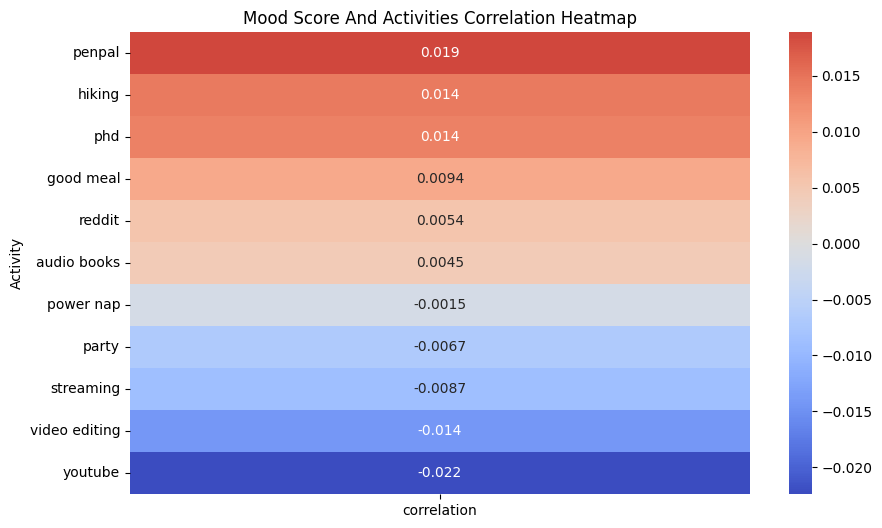

In [31]:
#Stretch Goals: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
sns.heatmap(
    activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Mood Score And Activities Correlation Heatmap')
plt.ylabel("Activity")

plt.savefig('mood_activites_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [32]:
# Display number of unique activities
activities_explode_df['activities'].nunique()

57

In [33]:
# Convert index to weekly periods
df['week'] = df.index.to_period('W')

In [34]:
# Calculate weekly average mood per weekday
weekly_weekday_mood_avg = (
    df.groupby(['week', 'weekday'])['mood_encoded']
    .mean()
    .reset_index()
)

weekly_pivot_df = weekly_weekday_mood_avg.pivot(
    index='week',
    columns='weekday',
    values='mood_encoded'
)

weekly_pivot_df.index = weekly_pivot_df.index.to_timestamp()

weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]
mon_thurs_list = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday'
    ]

weekly_pivot_df = weekly_pivot_df.reindex(columns=weekday_order)
mon_thurs_df = weekly_pivot_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday']].dropna(how='all')

<Axes: xlabel='week'>

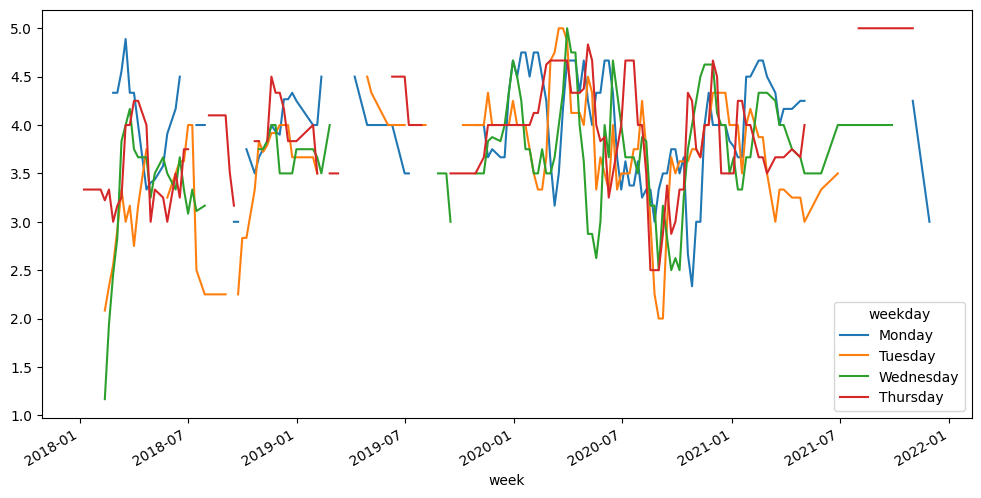

In [35]:
#this data is too messy probably not going to use this chart/
mon_thurs_smoothed = mon_thurs_df.sort_index().rolling(window=4, min_periods=2).mean()

plt.figure(figsize=(12, 6))
mon_thurs_smoothed.plot(ax=plt.gca())

In [36]:
# Calculate dataframes for bad and good weekdays
df_bad_weekday = df[df['mood_encoded'] <= 2]
df_good_weekday = df[df['mood_encoded'] >= 3]

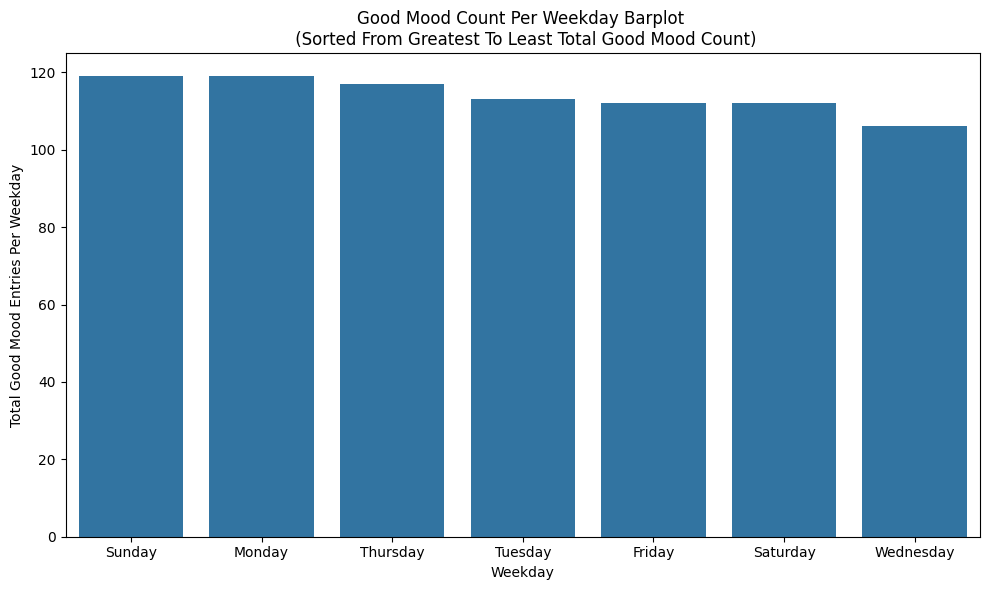

In [37]:
#Strech Goal: Mood trend by time of day or weekday using grouped line/bar charts
good_weekday_counts = df_good_weekday['weekday'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(data=good_weekday_counts)
plt.title('Good Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Good Mood Count)')
plt.ylabel('Total Good Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('good_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

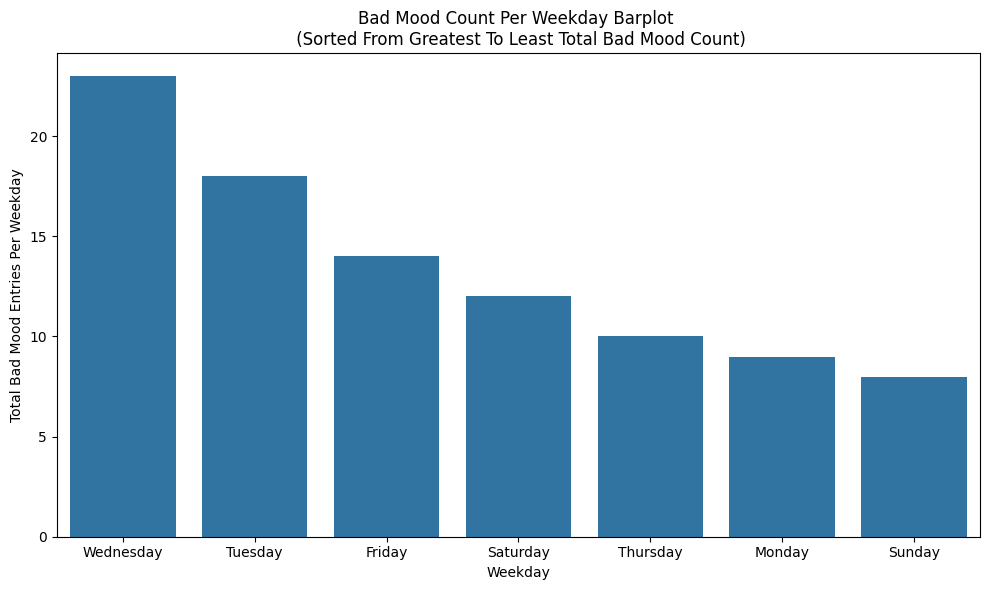

In [38]:
#Stretch Goal: Mood trend by time of day or weekday using grouped line/bar charts
bad_weekday_counts = df_bad_weekday['weekday'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(data=bad_weekday_counts)
plt.title('Bad Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Bad Mood Count)')
plt.ylabel('Total Bad Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('bad_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [39]:
#Stretch Goal: Add basic anomaly or pattern detection (e.g., highlight unusual mood drops or consistent weekly patterns).

#Just a concept still, very iffy if I'm going to use this or not.
def mood_alert(mood_score):
  if mood_score <= 2:
    print(f"I noticed you're having a rough day, have you tried anything to improve your mood?")

  if mood_score <= 3:
    print(f"I see you're in a good mood today.  Keep up the good work!")

  else:
    print(f"Not a valid entry")

In [40]:
# Split data into morning and evening based on time
df['hour'] = df.index.hour

morning_df = df[(df['hour'] >= 6) & (df['hour'] < 12)]

evening_df = df[(df['hour'] >= 17) & (df['hour'] <= 23)]

C:\Users\jeelf\AppData\Local\Temp\ipykernel_90556\1141753654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)


Text(0, 0.5, 'Count Of Users')

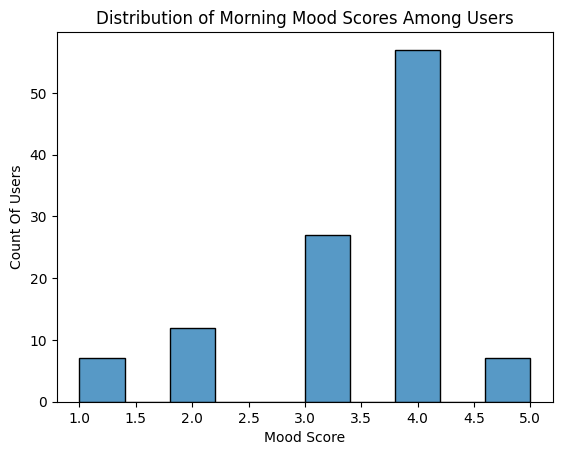

In [41]:
#I did this extra chart because it seems useful.
morning_df['mood_encoded'] = morning_df['mood_encoded'].astype(int)
sns.histplot(data=morning_df['mood_encoded'])

plt.title('Distribution of Morning Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of Users')

C:\Users\jeelf\AppData\Local\Temp\ipykernel_90556\2628990834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)


Text(0, 0.5, 'Count Of Users')

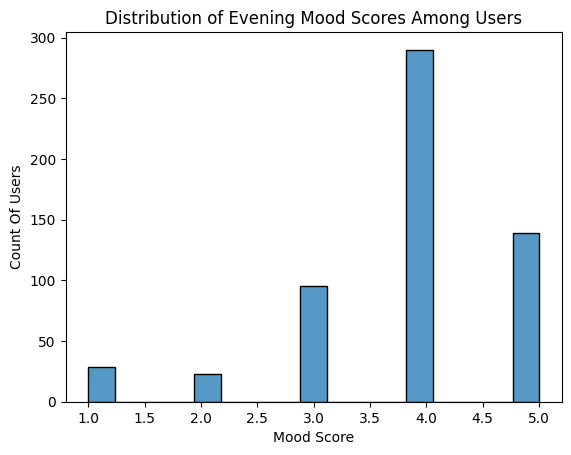

In [42]:
#I did this extra chart because it seems useful.
evening_df['mood_encoded'] = evening_df['mood_encoded'].astype(int)
sns.histplot(data=evening_df['mood_encoded'])

plt.title('Distribution of Evening Mood Scores Among Users')
plt.xlabel('Mood Score')
plt.ylabel('Count Of Users')

In [43]:
df.head()

,weekday,sub_mood,activities,mood,mood_encoded,week,hour
datetime,,,,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful,1,2021-11-29/2021-12-05,21
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good,4,2021-11-29/2021-12-05,21
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad,2,2021-11-29/2021-12-05,21
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing,5,2021-11-29/2021-12-05,21
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal,3,2021-11-01/2021-11-07,0


## JSON Format

In [34]:
## JSON Format — FINAL EXPORT (safe for SE team)

# 1. Make a copy so analysis columns don't affect final dataset
df_export = df.copy()

# 2. Drop 'week' because it is a Period object (not JSON serializable)
df_export = df_export.drop(columns=['week'], errors='ignore')

# 3. Reset index so datetime becomes a column
df_export = df_export.reset_index()

# 4. Convert datetime to a string (JSON safe)
df_export['datetime'] = df_export['datetime'].astype(str)

# 5. Make sure activities is a list (JSON-safe)
df_export['activities'] = df_export['activities'].apply(
    lambda x: list(x) if isinstance(x, list) else []
)

# 6. Export to JSON
df_export.to_json("final_mood_dataset.json", orient="records", indent=4)

print("JSON export completed successfully!")


JSON export completed successfully!


In [35]:
df_json = pd.read_json("final_mood_dataset.json")
display(df_json.head())

,datetime,weekday,sub_mood,activities,mood,mood_encoded
0,2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful,1
1,2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good,4
2,2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad,2
3,2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing,5
4,2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal,3
